In [ ]:
!pip install folium geopandas cartopy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 8.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.5 MB/s eta 0:00:00


In [ ]:
import folium
import geopandas as gpd

# Define the map centered over Brazil
m = folium.Map(location=[-10, -55], zoom_start=4)

# Load a GeoJSON file with region boundaries
geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
gdf = gpd.read_file(geojson_url)

# Define a function to classify danger levels
def classify_danger(state):
    danger_mapping = {
        "Amazonas": "orange",
        "Pará": "yellow",
        "Rio Grande do Sul": "red",
    }
    return danger_mapping.get(state, "white")

# Add polygons with color coding
for _, row in gdf.iterrows():
    color = classify_danger(row["name"])  # Assuming "name" contains state names
    folium.GeoJson(
        row["geometry"],
        style_function=lambda feature, color=color: {"fillColor": color, "color": "black", "fillOpacity": 0.5},
    ).add_to(m)

# Add warning markers
danger_zones = [(-3.5, -60), (-15, -50), (-30, -55)]  # Example locations
for lat, lon in danger_zones:
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(color="black", icon="exclamation-triangle", prefix="fa"),
    ).add_to(m)

# Save map to file
m.save("map.html")


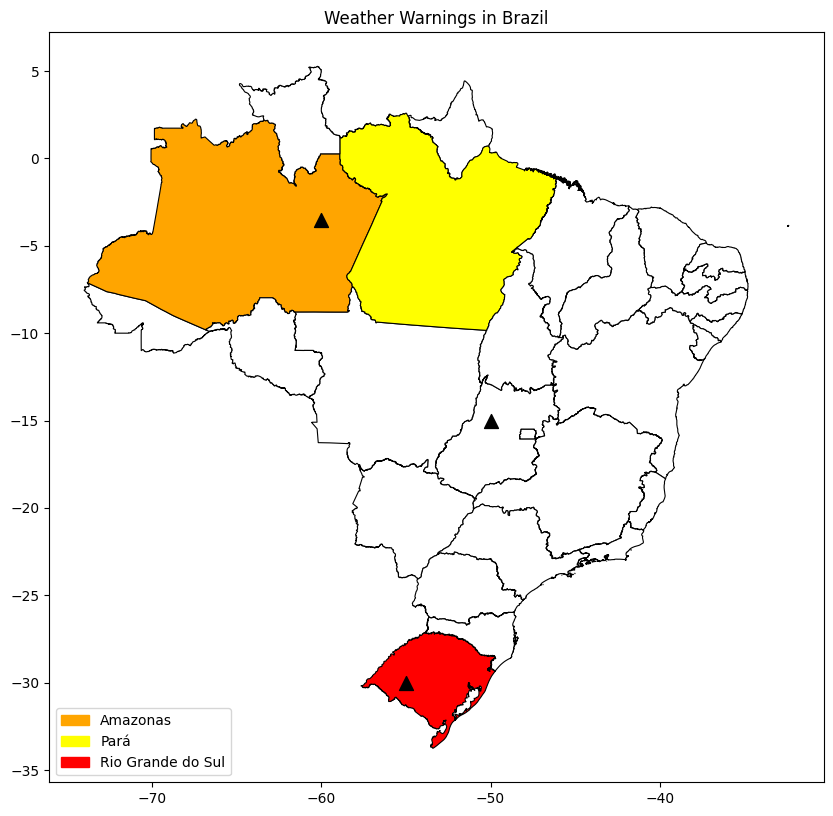

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load Brazil states GeoJSON
geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
gdf = gpd.read_file(geojson_url)

# Define danger levels (example)
danger_levels = {
    "Amazonas": "orange",
    "Pará": "yellow",
    "Rio Grande do Sul": "red",
}

# Assign colors
gdf["color"] = gdf["name"].map(danger_levels).fillna("white")

# Plot map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(color=gdf["color"], edgecolor="black", linewidth=0.8, ax=ax)

# Add markers for warning locations
warning_locs = [(-3.5, -60), (-15, -50), (-30, -55)]  # Example coordinates
for lat, lon in warning_locs:
    ax.scatter(lon, lat, color="black", marker="^", s=100, label="Warning" if "Warning" not in ax.get_legend_handles_labels()[1] else "")

# Add legend
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in danger_levels.items()]
ax.legend(handles=legend_patches, loc="lower left")

ax.set_title("Weather Warnings in Brazil")
plt.show()


In [6]:
def plot_weather_zones():
    """
    Demonstrates how to create a region map based on a weather factor (e.g., temperature),
    rather than administrative boundaries (e.g., states).

    Approach:
    1. **Obtain or Create GeoData**:
       - Use a GeoJSON or Shapefile with polygons representing different temperature zones.
       - Each polygon has an attribute, for example 'temperature'.

    2. **Use Folium for Mapping**:
       - Initialize a `folium.Map` centered on the desired region.
       - Use `folium.Choropleth` or `GeoJson` layers to visualize the polygons.
       - Style polygons based on the temperature (e.g., color scale).

    3. **Add Additional Layers**:
       - Add markers or icons for warnings (storms, heatwaves, etc.).
       - Optionally include a legend or popup info.

    4. **Export or Display**:
       - Call `m.save("map.html")` to generate an interactive HTML map.
    """
    import folium
    import geopandas as gpd

    # Example: load custom GeoJSON where each polygon has a 'zone_id' and 'temperature'
    gdf = gpd.read_file("weather_zones.geojson")

    # Create a base map
    m = folium.Map(location=[-14.2, -51.9], zoom_start=4)

    # Add a choropleth layer colored by 'temperature'
    folium.Choropleth(
        geo_data=gdf,
        data=gdf,
        columns=["zone_id", "temperature"],
        key_on="feature.properties.zone_id",
        fill_color="YlOrRd",  # Color scale (e.g., yellow to red)
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name="Temperature (°C)",
    ).add_to(m)

    # Optionally, add markers for alerts
    alerts = [(-3.5, -60), (-15, -50), (-30, -55)]  # Example coords
    for lat, lon in alerts:
        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(icon="exclamation-triangle", prefix="fa", color="black")
        ).add_to(m)

    # Save or display the map
    m.save("weather_map.html")


In [7]:
def display_weather_map():
    """
    Demonstrates how to display an interactive Folium map inline in a Jupyter notebook
    or save it as an HTML file to open in a browser.
    """

    import folium
    from IPython.display import IFrame

    # Simple example map
    m = folium.Map(location=[-14.2, -51.9], zoom_start=4)

    # Add a simple marker
    folium.Marker(
        location=[-14.2, -51.9],
        popup="Center",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

    # 1. **Save and Open in Browser**:
    # m.save("weather_map.html")
    # Open the generated 'weather_map.html' in a web browser.

    # 2. **Display Inline (Jupyter Notebook)**:
    # Display the map directly in a notebook cell:
    return m

# Usage in a Jupyter notebook:
# map_object = display_weather_map()
# map_object  # This displays the map inline
# OR
# map_object.save("weather_map.html")
# from IPython.display import IFrame
# IFrame("weather_map.html", width=700, height=500)
display_weather_map()

/Users/aimenobrega/Projetos/stress-temperature/.venv/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/aimenobrega/Projetos/stress-temperature/.venv/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/aimenobrega/Projetos/stress-temperature/.venv/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


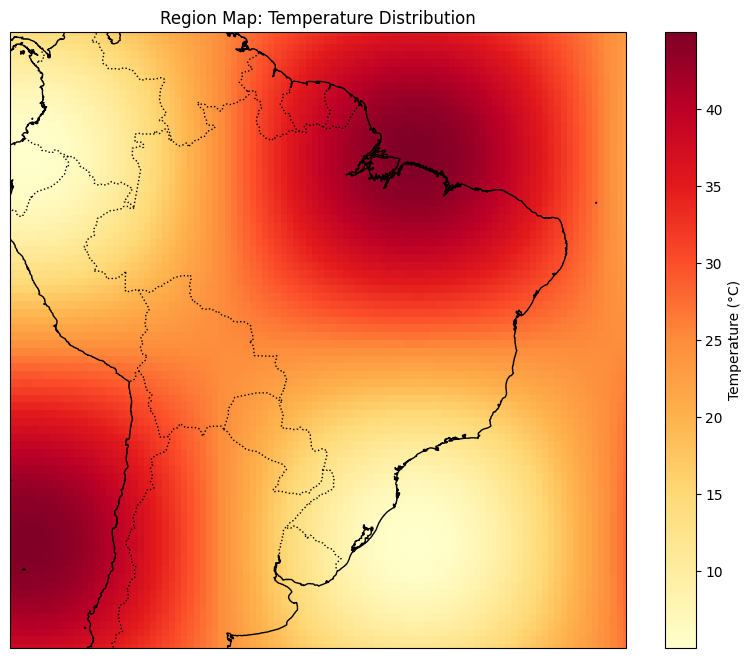

In [10]:
def plot_temperature_map_cartopy():
    """
    Plots a static region map based on temperature data using Cartopy.

    Approach:
    1. **Data Generation**:
       - Create a grid of longitude and latitude values.
       - Simulate temperature data over the grid (replace with actual data as needed).

    2. **Cartopy Map Setup**:
       - Use a PlateCarree projection.
       - Set map extent and add natural features like coastlines and borders.

    3. **Plotting**:
       - Plot the temperature data using `pcolormesh` with a color scale (e.g., 'YlOrRd').
       - Add a colorbar and title for context.

    Usage:
        plot_temperature_map_cartopy()
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature

    # 1. Generate a grid of coordinates (example region: similar to Brazil)
    lon = np.linspace(-80, -30, 100)  # Longitude range
    lat = np.linspace(-40, 10, 80)     # Latitude range
    lon2d, lat2d = np.meshgrid(lon, lat)

    # Simulate temperature data (replace with actual data if available)
    temperature = np.sin(0.1 * lon2d) * np.cos(0.1 * lat2d) * 20 + 25

    # 2. Setup the map with Cartopy's PlateCarree projection
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

    # Add natural features
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', alpha=0.5)

    # 3. Plot the temperature data with a color mesh
    mesh = ax.pcolormesh(lon2d, lat2d, temperature,
                         cmap='YlOrRd', shading='auto',
                         transform=ccrs.PlateCarree())

    # Add a colorbar and title
    plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05, label='Temperature (°C)')
    ax.set_title("Region Map: Temperature Distribution")

    plt.show()


# Call the function to display the map
plot_temperature_map_cartopy()


/Users/aimenobrega/Projetos/stress-temperature/.venv/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


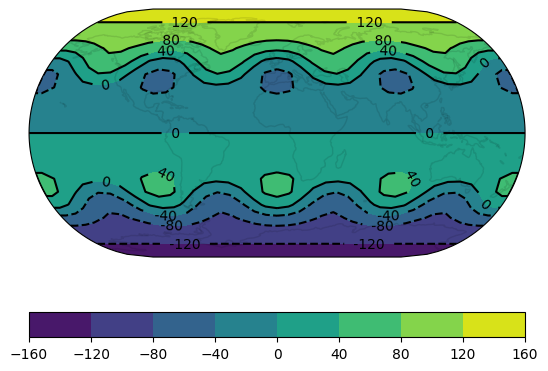

In [11]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


def sample_data(shape=(73, 145)):
    """Return ``lons``, ``lats`` and ``data`` of some fake data."""
    import numpy as np

    nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    return lons, lats, data


def main():
    fig = plt.figure()

    # Setup a global EckertIII map with faint coastlines.
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
    ax.set_global()
    ax.coastlines('110m', alpha=0.1)

    # Use the same sample data as the waves example, but make it
    # more dependent on y for more interesting contours.
    x, y, z = sample_data((20, 40))
    z = z * -1.5 * y

    # Add colourful filled contours.
    filled_c = ax.contourf(x, y, z, transform=ccrs.PlateCarree())

    # And black line contours (or set colors='none' for invisible lines).
    line_c = ax.contour(x, y, z, levels=filled_c.levels,
                        colors='black',
                        transform=ccrs.PlateCarree())

    # Add a colorbar for the filled contour.
    fig.colorbar(filled_c, orientation='horizontal')

    # Use the line contours to place contour labels.
    ax.clabel(
        line_c,  # Typically best results when labelling line contours.
        colors=['black'],
        manual=False,  # Automatic placement vs manual placement.
        inline=True,  # Cut the line where the label will be placed.
        fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
    )

    plt.show()

main()

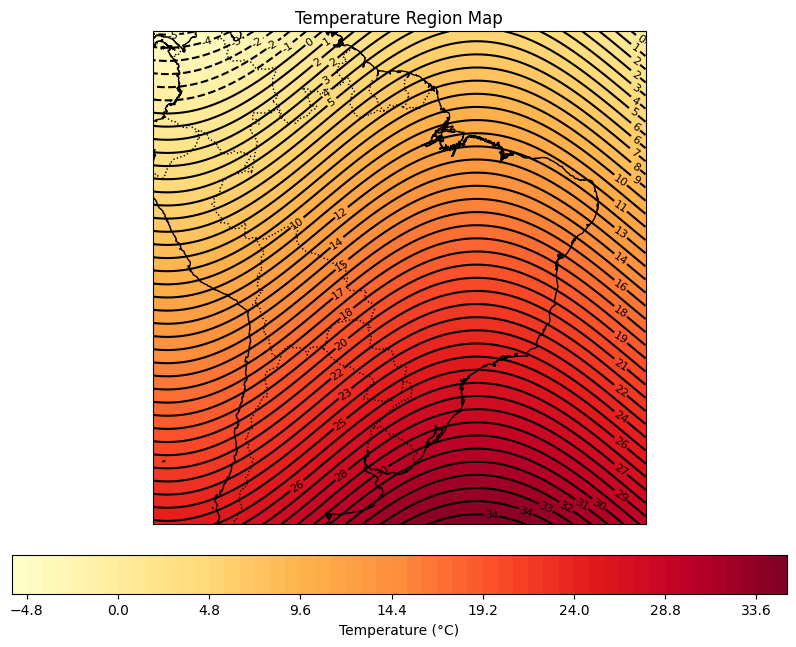

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def generate_temperature_data(shape=(50, 100)):
    """
    Generates sample temperature data over a geographic grid.
    
    Approach:
    1. Define a latitude and longitude range (example: covering a region similar to Brazil).
    2. Create a 2D grid of coordinates.
    3. Simulate temperature data as a function of latitude (and optionally longitude) 
       to mimic realistic gradients (e.g., warmer in the north, cooler in the south).
    
    Returns:
        lons: 2D numpy array of longitudes (degrees).
        lats: 2D numpy array of latitudes (degrees).
        temp: 2D numpy array of simulated temperature values.
    """
    # Define grid dimensions and coordinate ranges:
    nlats, nlons = shape
    lats = np.linspace(-40, 10, nlats)    # Latitude range in degrees
    lons = np.linspace(-80, -30, nlons)     # Longitude range in degrees
    lons, lats = np.meshgrid(lons, lats)
    
    # Simulate temperature: decrease temperature as latitude increases,
    # add a modulation based on longitude for variety.
    temp = 30 - (lats + 40) * (30 / 50) + 5 * np.sin(0.1 * lons)
    return lons, lats, temp

def main():
    """
    Plots a static temperature region map using Cartopy.
    
    Approach:
    1. Generate sample temperature data with a custom grid.
    2. Setup a Cartopy map with a PlateCarree projection.
    3. Define the map extent to match the region of interest.
    4. Plot filled contours for the temperature data using a color scale ('YlOrRd').
    5. Overlay contour lines with labels.
    6. Add a colorbar to display the temperature scale.
    
    Run this function to display the map.
    """
    # Create a figure with a Cartopy PlateCarree projection.
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # Set the extent of the map [west, east, south, north]
    ax.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
    
    # Add natural features for context.
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', alpha=0.5)
    
    # Generate sample temperature data.
    lons, lats, temp = generate_temperature_data(shape=(50, 100))
    
    # Plot colorful filled contours based on temperature.
    filled = ax.contourf(lons, lats, temp, levels=60, transform=ccrs.PlateCarree(), cmap='YlOrRd')
    
    # Overlay black contour lines.
    lines = ax.contour(lons, lats, temp, levels=filled.levels, colors='black', transform=ccrs.PlateCarree())
    
    # Label the contour lines.
    ax.clabel(lines, inline=True, fontsize=8, fmt='%.0f')
    
    # Add a horizontal colorbar to indicate temperature values.
    fig.colorbar(filled, orientation='horizontal', pad=0.05, label='Temperature (°C)')
    
    plt.title("Temperature Region Map")
    plt.show()

if __name__ == '__main__':
    main()
